<a href="https://colab.research.google.com/github/muhammadali122/Human-Emotion-Detection/blob/main/Fyp_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import seaborn as sns
from numpy.fft import fft, fftfreq
import pywt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
emotions_eeg = pd.read_csv("/content/drive/MyDrive/FYP Project/new_emotions.csv", on_bad_lines='skip')

In [ ]:
dataset= emotions_eeg.iloc[:,1:750]
labels=emotions_eeg.iloc[:,750]
dataset['label']=labels

In [ ]:
dataset

,fft_1_b,fft_2_b,fft_3_b,fft_4_b,fft_5_b,fft_6_b,fft_7_b,fft_8_b,fft_9_b,fft_10_b,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,438.00,-222.00,-222.00,438.00,143.0,59.40,5.05,5.05,59.40,-159.0,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,-4.00,7.42,7.42,-4.00,81.6,-22.30,35.30,35.30,-22.30,178.0,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,361.00,-62.20,-62.20,361.00,-558.0,684.00,-152.00,-152.00,684.00,-312.0,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,3.89,12.10,12.10,3.89,-188.0,274.00,-200.00,-200.00,274.00,258.0,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,-27.40,147.00,147.00,-27.40,301.0,-8.48,138.00,138.00,-8.48,349.0,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,3.37,29.20,29.20,3.37,151.0,-19.40,8.89,8.89,-19.40,124.0,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,202.00,-81.60,-81.60,202.00,-345.0,404.00,-205.00,-205.00,404.00,-123.0,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,312.00,-259.00,-259.00,312.00,-186.0,276.00,-199.00,-199.00,276.00,342.0,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,2.48,49.00,49.00,2.48,-230.0,216.00,-92.40,-92.40,216.00,-879.0,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


In [ ]:
labels

0       NEGATIVE
1        NEUTRAL
2       POSITIVE
3       POSITIVE
4        NEUTRAL
          ...   
2127     NEUTRAL
2128    POSITIVE
2129    NEGATIVE
2130    NEGATIVE
2131     NEUTRAL
Name: label, Length: 2132, dtype: object

In [ ]:
i=7
sample1=dataset.iloc[i,dataset.columns != 'label']

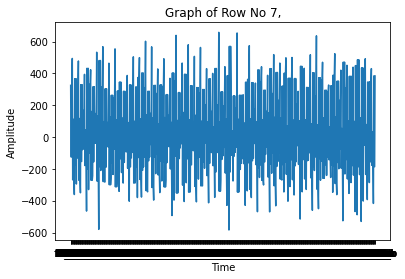

In [ ]:
plt.figure(1)
plt.plot(sample1)
plt.title('Graph of Row No {},'.format(i))
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

Ploting FFT of the signal

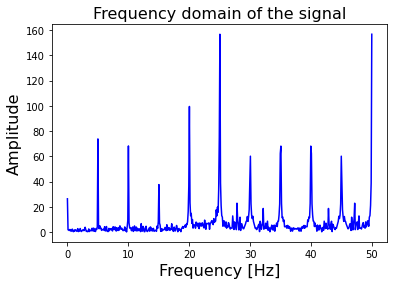

In [ ]:
from scipy.fftpack import fft
 
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values
 
t_n = 10
N = 1000
T = t_n / N
f_s = 1/T
 
f_values, fft_values = get_fft_values(sample1, T, N, f_s)
 
plt.plot(f_values, fft_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.show()

In [ ]:
dataset['label'].value_counts()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

In [ ]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

Split Data into Testing & Training

In [ ]:
def preprocess_inputs(df):
    df=df.copy()
    
    df['label'] = df['label'].replace(label_mapping)
    
    y=df['label'].copy()
    x=df.drop('label',axis=1).copy()
    
    x_train,x_test,y_train,y_test = train_test_split(x, y, train_size=0.7, random_state=123)
    
    return x_train, x_test, y_train, y_test

In [ ]:
x_train, x_test, y_train, y_test = preprocess_inputs(dataset)

CWT Implementation

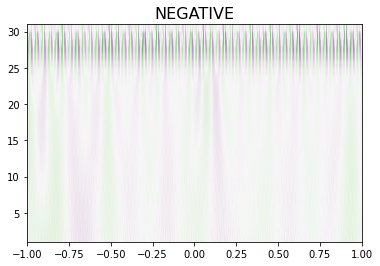

In [ ]:
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(sample1, widths, 'mexh')
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  
plt.title(labels[i], fontsize=16)
plt.show() 

In [ ]:
label_df = dataset['label']
dataset.drop('label', axis = 1, inplace=True)

In [ ]:
correlations = dataset.corr(method='pearson')
correlations

,fft_1_b,fft_2_b,fft_3_b,fft_4_b,fft_5_b,fft_6_b,fft_7_b,fft_8_b,fft_9_b,fft_10_b,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
fft_1_b,1.000000,-0.876557,-0.876557,1.000000,-0.416398,0.498501,-0.367296,-0.367296,0.498501,-0.452929,...,-0.408890,0.475166,-0.333603,-0.333603,0.475166,-0.413121,0.454465,-0.334815,-0.334815,0.454465
fft_2_b,-0.876557,1.000000,1.000000,-0.876557,0.407725,-0.425948,0.481940,0.481940,-0.425948,0.340327,...,0.360549,-0.417590,0.321492,0.321492,-0.417590,0.293997,-0.325663,0.264721,0.264721,-0.325663
fft_3_b,-0.876557,1.000000,1.000000,-0.876557,0.407725,-0.425948,0.481940,0.481940,-0.425948,0.340327,...,0.360549,-0.417590,0.321492,0.321492,-0.417590,0.293997,-0.325663,0.264721,0.264721,-0.325663
fft_4_b,1.000000,-0.876557,-0.876557,1.000000,-0.416398,0.498501,-0.367296,-0.367296,0.498501,-0.452929,...,-0.408890,0.475166,-0.333603,-0.333603,0.475166,-0.413121,0.454465,-0.334815,-0.334815,0.454465
fft_5_b,-0.416398,0.407725,0.407725,-0.416398,1.000000,-0.937872,0.845393,0.845393,-0.937872,0.458701,...,0.813301,-0.820372,0.714146,0.714146,-0.820372,0.350699,-0.430295,0.252874,0.252874,-0.430295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fft_745_b,-0.413121,0.293997,0.293997,-0.413121,0.350699,-0.382383,0.289672,0.289672,-0.382383,0.820630,...,0.458558,-0.431711,0.415781,0.415781,-0.431711,1.000000,-0.938696,0.834622,0.834622,-0.938696
fft_746_b,0.454465,-0.325663,-0.325663,0.454465,-0.430295,0.457297,-0.369929,-0.369929,0.457297,-0.829208,...,-0.493145,0.531019,-0.459876,-0.459876,0.531019,-0.938696,1.000000,-0.815108,-0.815108,1.000000
fft_747_b,-0.334815,0.264721,0.264721,-0.334815,0.252874,-0.278506,0.193019,0.193019,-0.278506,0.696402,...,0.375438,-0.355117,0.499272,0.499272,-0.355117,0.834622,-0.815108,1.000000,1.000000,-0.815108
fft_748_b,-0.334815,0.264721,0.264721,-0.334815,0.252874,-0.278506,0.193019,0.193019,-0.278506,0.696402,...,0.375438,-0.355117,0.499272,0.499272,-0.355117,0.834622,-0.815108,1.000000,1.000000,-0.815108


In [ ]:
skew = dataset.skew()
skew

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


fft_1_b      1.319420
fft_2_b     -0.431782
fft_3_b     -0.431782
fft_4_b      1.319420
fft_5_b     -1.286684
               ...   
fft_745_b   -1.328085
fft_746_b    1.443938
fft_747_b    1.221094
fft_748_b    1.221094
fft_749_b    1.443938
Length: 749, dtype: float64

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(dataset)
pca = PCA(n_components = 20)
pca_vectors = pca.fit_transform(scaled_df)
for index, var in enumerate(pca.explained_variance_ratio_):
    print("Explained Variance ratio by Principal Component ", (index+1), " : ", var)

Explained Variance ratio by Principal Component  1  :  0.5313074792517972
Explained Variance ratio by Principal Component  2  :  0.15381266670694013
Explained Variance ratio by Principal Component  3  :  0.13815499493381372
Explained Variance ratio by Principal Component  4  :  0.025533337303402803
Explained Variance ratio by Principal Component  5  :  0.01813647866296995
Explained Variance ratio by Principal Component  6  :  0.011497225200287883
Explained Variance ratio by Principal Component  7  :  0.008336264713824525
Explained Variance ratio by Principal Component  8  :  0.0066286988627255235
Explained Variance ratio by Principal Component  9  :  0.005646875323945422
Explained Variance ratio by Principal Component  10  :  0.0055140583784917836
Explained Variance ratio by Principal Component  11  :  0.005151476068681016
Explained Variance ratio by Principal Component  12  :  0.004509429200409768
Explained Variance ratio by Principal Component  13  :  0.004217129413490034
Explained V

# PCA(Principal Component Analysis)

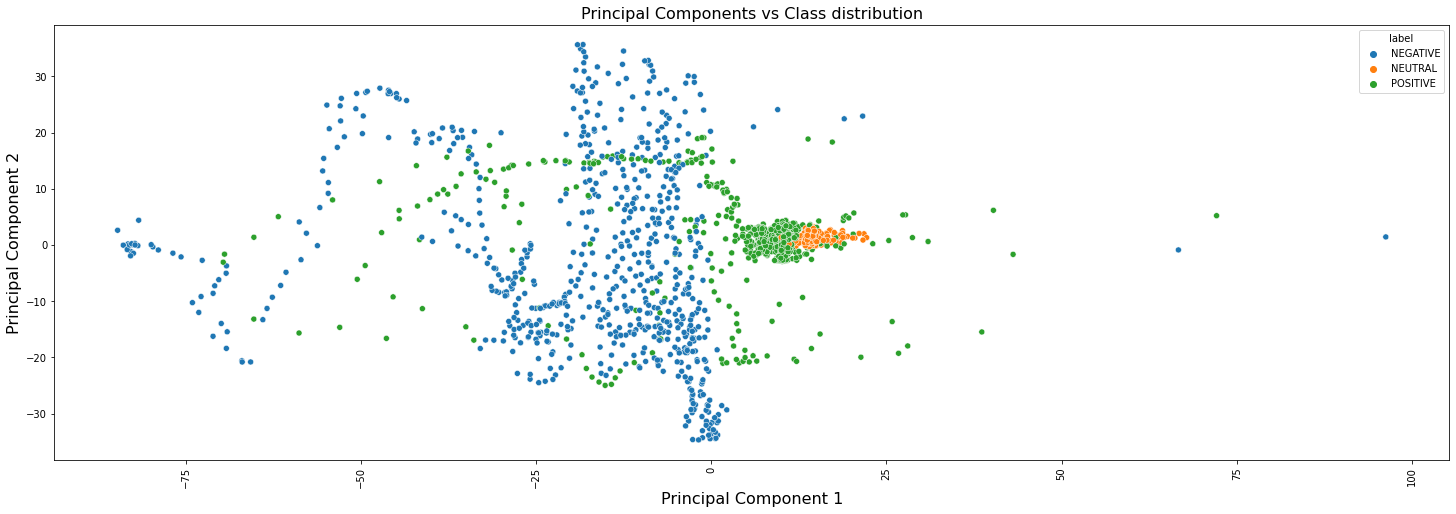

In [ ]:
plt.figure(figsize=(25,8))
sns.scatterplot(x=pca_vectors[:, 0], y=pca_vectors[:, 1], hue=label_df)
plt.title('Principal Components vs Class distribution', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=16)
plt.xticks(rotation='vertical');

# Logistic Regression

In [ ]:
%%time
pl_log_reg_pca = Pipeline(steps=[('scaler',StandardScaler()),
                             ('pca', PCA(n_components = 2)),
                             ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=4000))])
scores = cross_val_score(pl_log_reg_pca, x_train, y_train, cv=10,scoring='accuracy')
pl_log_reg_pca.fit(x_train, y_train)
pred_pl_logistic_regression= pl_log_reg_pca.predict(x_test)
print('Accuracy for Logistic Regression with 2 Principal Components: ', scores.mean())

Accuracy for Logistic Regression with 2 Principal Components:  0.8766711409395974
CPU times: user 8.04 s, sys: 1.27 s, total: 9.31 s
Wall time: 7.39 s


# Confusion Matrix For Logistic Regresssion

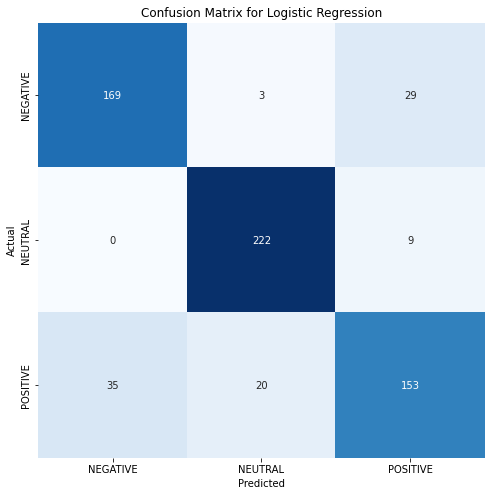

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.83      0.84      0.83       201
     NEUTRAL       0.91      0.96      0.93       231
    POSITIVE       0.80      0.74      0.77       208

    accuracy                           0.85       640
   macro avg       0.85      0.85      0.84       640
weighted avg       0.85      0.85      0.85       640



In [ ]:
from sklearn.metrics import confusion_matrix  
_pred = np.array(list(map(lambda x: np.argmax(x), pred_pl_logistic_regression)))

cm = confusion_matrix(y_test, pred_pl_logistic_regression)
clr = classification_report(y_test,pred_pl_logistic_regression, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

print("Classification Report:\n----------------------\n", clr)

## Random Forest

In [ ]:
%%time

pl_random_forest = Pipeline(steps=[('random_forest', RandomForestClassifier())])
scores = cross_val_score(pl_random_forest, x_train, y_train, cv=10,scoring='accuracy')
pl_random_forest.fit(x_train, y_train)
pred_pl_random_forest= pl_random_forest.predict(x_test)
print('Accuracy for RandomForest : ', scores.mean())

Accuracy for RandomForest :  0.9289709172259508
CPU times: user 24.3 s, sys: 24.4 ms, total: 24.3 s
Wall time: 24.8 s


Confusion Matrix for Random Forest

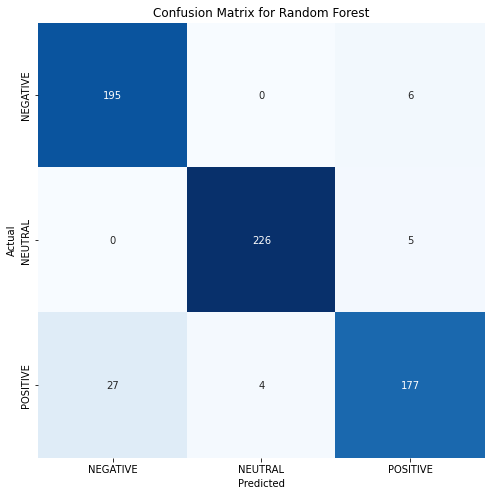

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.88      0.97      0.92       201
     NEUTRAL       0.98      0.98      0.98       231
    POSITIVE       0.94      0.85      0.89       208

    accuracy                           0.93       640
   macro avg       0.93      0.93      0.93       640
weighted avg       0.94      0.93      0.93       640



In [ ]:
from sklearn.metrics import confusion_matrix  
_pred = np.array(list(map(lambda x: np.argmax(x), pred_pl_random_forest)))

cm = confusion_matrix(y_test, pred_pl_random_forest)
clr = classification_report(y_test, pred_pl_random_forest, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")
plt.show()

print("Classification Report:\n----------------------\n", clr)

## SVM(Support Vector Machine)

In [ ]:
%%time

pl_svm = Pipeline(steps=[('scaler',StandardScaler()),
                             ('pl_svm', SVC())])
scores = cross_val_score(pl_svm, x_train, y_train, cv=10,scoring='accuracy')
pl_svm.fit(x_train, y_train)
pred_svm= pl_svm.predict(x_test)
print('Accuracy for Linear SVM : ', scores.mean())

Accuracy for Linear SVM :  0.9370201342281879
CPU times: user 3.3 s, sys: 11.8 ms, total: 3.31 s
Wall time: 3.3 s


Confusion Matrix For SVM

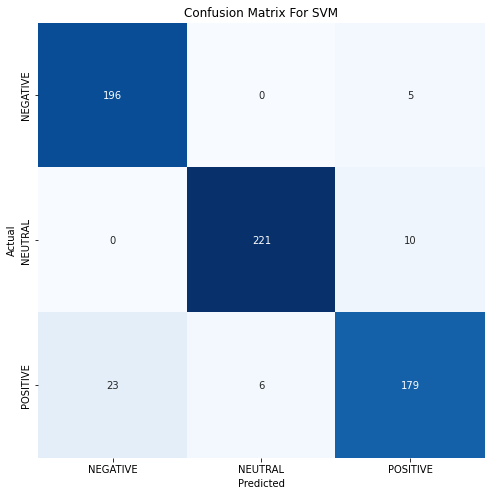

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.89      0.98      0.93       201
     NEUTRAL       0.97      0.96      0.97       231
    POSITIVE       0.92      0.86      0.89       208

    accuracy                           0.93       640
   macro avg       0.93      0.93      0.93       640
weighted avg       0.93      0.93      0.93       640



In [ ]:
from sklearn.metrics import confusion_matrix  
_pred = np.array(list(map(lambda x: np.argmax(x), pred_svm)))

cm = confusion_matrix(y_test, pred_svm)
clr = classification_report(y_test, pred_svm, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix For SVM")
plt.show()

print("Classification Report:\n----------------------\n", clr)

## ANN(Artificial Neural Network)

In [ ]:
#@title
%%time

pl_mlp = Pipeline(steps=[('scaler',StandardScaler()),
                             ('mlp_ann', MLPClassifier(hidden_layer_sizes=(1275, 637)))])
scores = cross_val_score(pl_mlp, x_train, y_train, cv=10,scoring='accuracy')
pl_mlp.fit(x_train, y_train)
pred_mlp= pl_mlp.predict(x_test)
print('Accuracy for ANN : ', scores.mean())

Confusion Matrix For ANN

In [ ]:
#@title
from sklearn.metrics import confusion_matrix  
_pred = np.array(list(map(lambda x: np.argmax(x), pred_mlp)))

cm = confusion_matrix(y_test, pred_mlp)
clr = classification_report(y_test, pred_mlp, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix For ANN")
plt.show()

print("Classification Report:\n----------------------\n", clr)

# CNN